This example aims to have two target orbits, and one observer orbit. The observer is tasked with monitoring the two targets to minimize the trace covariance of the state over the simulation horizon. We use a PPO agent that is rewarded for minimizing the trace covariance of the target states to the best of its ability.

In [1]:
%matplotlib widget
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from SensorTasking.ssa_problem import SSA_Problem
from plotting import visualize_info_vs_phase, render, plot_orbits, _visualize_info_other_observers_fixed
from SensorTasking.greedy_search import greedy_search

In [2]:
# L2 Halo orbit, period = 3.225 TU  (Target orbit)
x0_1 = np.array([
        1.1540242813087864,
        0.0,
        -0.1384196144071876,
        4.06530060663289e-15,
        -0.21493019200956867,
        8.48098638414804e-15
    ])

# L1 lyapunov, period = 3.225 TU (target orbit)
x0_2 = np.array([
        0.8027692908754149,
        0.0,
        0.0,
        -1.1309830924549648e-14,
        0.33765564334938736,
        0.0
    ])


# 1:1 L2 Lyapunov, period = 6.45 TU (observer orbit)
x0_3 = np.array([
        0.9982702689023665,
        0.0,
        0.0,
        -2.5322340091977996e-14,
        1.5325475708886613,
        0.0
    ])

# 1:1 L1 Lyapunov, period = 6.45 TU (observer orbit)
x0_4 = np.array([
            0.65457084231188,
        0.0,
        0.0,
        3.887957091335523e-13,
        0.7413347560791179,
        0.0
])


# 2:1 Resonant, period = 6.45 TU
x0_5 = np.array([
        0.9519486347314083,
        0.0,
        0.0,
        0.0,
        -0.952445273435512,
        0.0
    ])

# 3:1 Resonant, period = 6.45 TU
x0_6 = np.array([
        0.13603399956670137,
        0.0,
        0.0,
        1.9130717669166003e-12,
        3.202418276067991,
        0.0
    ])

# DRO, period = 6.15436531128442 TU
x0_7 = np.array([
    3.86808653812329E-01,
    6.8407409893399E-24,	
    -5.60033463922659E-24,	
    1.09155528781707E-12,	
    1.60446309748097E+00,	
    1.32939502714562E-23
])

# DRO, period = 5.0298610501976651 TU
x0_8 = np.array([
    	6.8355909882592514E-1,
        1.9414482129110789E-23,	
        -4.7191016718963267E-25,	
        -1.6753163837408492E-13,	
        7.2752642654283473E-1,	
        1.1511771211953919E-26
])

# L2 Lyapunov, period = 3.7132531304869154 TU
x0_9 = np.array([
    	1.0636292377522296E+0,
        -3.1952388095755208E-28,	
        9.6105846729337803E-36,	
        4.8862169349265717E-15,	
        4.6223063293086447E-1,	
        -9.4408653291941199E-34
])

# L1 Axial, period = 	4.0644559461513419 TU
x0_10 = np.array([
    8.6820930401836149E-1,
    5.5027367208688037E-28,
    -4.4974818793315218E-14,
    5.2267698022197043E-14,
    5.8641302242843835E-2,
    -4.5352796623152170E-1
])

# butterfly, period = 3.7265552310265724 TU
x0_11 = np.array([
    9.0453898750573813E-1,
    -3.0042855182227924E-26,
    1.4388186844294218E-1,
    -8.5656563732450135E-15,
    -4.9801575824700677E-2,
    -1.9332247649544646E-14
])



In [3]:
opt = "max"
prob = SSA_Problem(target_ics=[x0_1, x0_2, x0_9],
                   target_periods=[ 3.225, 3.225, 3.7132531304869154],
                   agent_ics=[x0_7, x0_8, x0_10, x0_11],
                   agent_periods=[ 6.15436531128442, 5.0298610501976651,4.0644559461513419, 3.7265552310265724],
                   opt=opt)

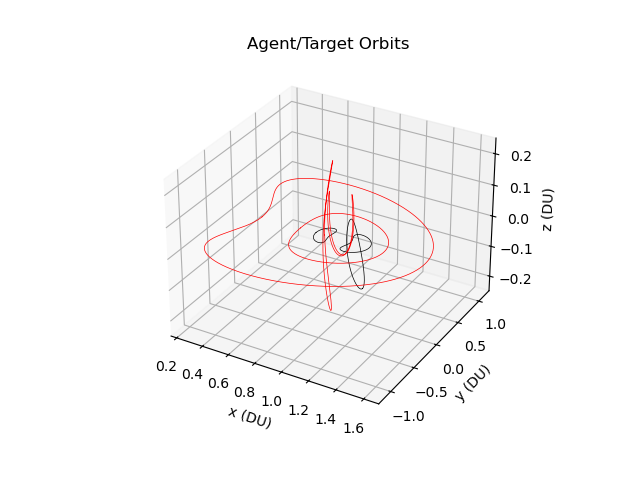

In [4]:
plot_orbits(prob, fig=10, projection="3d")

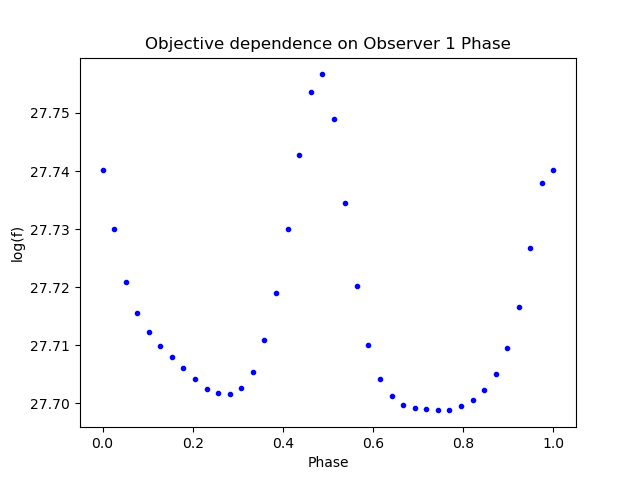

In [5]:
plt.figure(1)
phases = np.linspace(0, 1., 40)
visualize_info_vs_phase(prob, phases, observer=1, fig=1)

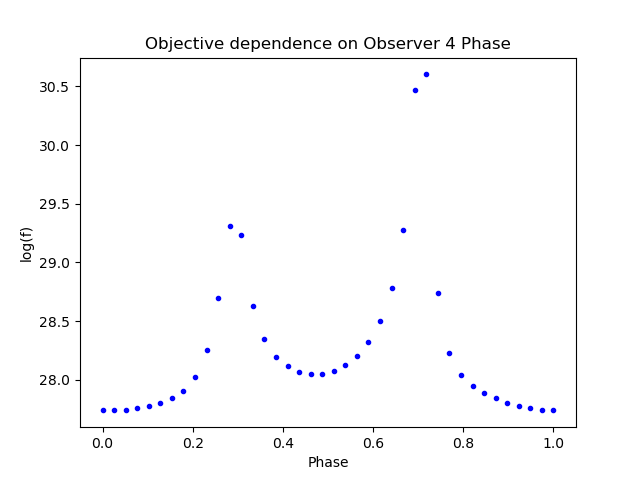

In [6]:
plt.figure(2)
phases = np.linspace(0., 1.0, 40)
visualize_info_vs_phase(prob, phases, 4, 2)

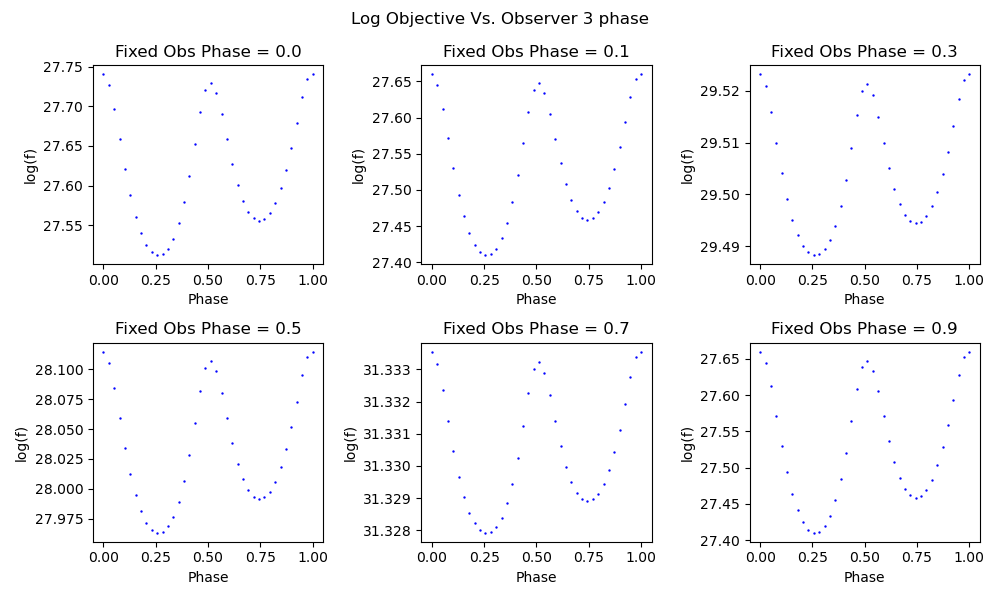

In [7]:
_visualize_info_other_observers_fixed(prob=prob, observer=3, fig_num=5)

In [8]:
Y = np.array([x0_1, x0_2, x0_9])
Y_periods = np.array([ 3.225, 3.225, 3.7132531304869154])
X = np.array([x0_7, x0_8, x0_10, x0_11])
X_periods = np.array([ 6.15436531128442, 5.0298610501976651,4.0644559461513419, 3.7265552310265724])
phases, control, objective = greedy_search(Y, Y_periods, X, X_periods, init_phase_guess=None, opt=opt)
print(f"obj type: ", opt)
print("log obj ", np.log(objective))
print("phases ", phases)

Beginning Optimization...

Finished in 14.255869388580322 sec.
obj type:  max
log obj  33.93407225028948
phases  [0.4819418164661778, 0.476427007544789, 0.9950275974509848, 0.70639993647834]
